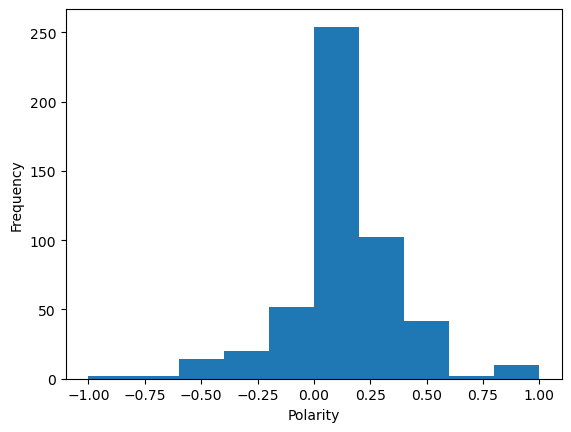

In [3]:
import praw
from textblob import TextBlob
import re

import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Authenticate with Reddit API
reddit = praw.Reddit(client_id='vxbfTX49ONq2R57zgrtUfA', client_secret='-82TVmi2b8Y9RtZ3GI1pxfTWomz6mg', user_agent='sentiment/1.0')

# Retrieve comments from a subreddit
subreddit = reddit.subreddit('virtualreality')
comments = subreddit.comments(limit=500)

# Pre-process comments
clean_comments = []
for comment in comments:
    text = comment.body.lower()
    text = re.sub('[^a-zA-Z\s]', '', text)  # Remove special characters
    text = re.sub('\s+', ' ', text)  # Remove extra whitespace
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stop words
    clean_comments.append(text)
    #print(text)

# Perform sentiment analysis
polarity_scores = []
for comment in clean_comments:
    blob = TextBlob(comment)
    polarity_scores.append(blob.sentiment.polarity)

# Visualize results
import matplotlib.pyplot as plt
plt.hist(polarity_scores)
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()


In [5]:
import csv

myFile = open('Reddit_comments.csv', 'r+')
print(myFile.read())
print(clean_comments)
writer = csv.writer(myFile)
writer.writerow(clean_comments)
myFile.close()
myFile = open('Reddit_comments.csv', 'r')
print(myFile.read())


['loop quest thing quest pro running pc vr', 'one ive used works even remotely well vrik mod skyrim vr freely adjust sorts variables make characters skeleton match gameplay benefits mod provides excellent certainly one immersive systems', 'completely disagree essence comment reads like great immersive experiences flat games past sucked life experience point spark gone youre thinking nailing screens face going get good old feeling vr new medium medium crouch bend look around corners sure try games love vr wont work practice', 'think router fine guess ill know actually headset fingers crossed looking like shell extra euro everyone seems suggesting upgrade worth thanks tips man', 'talk day long xre quest dont built cameras controllers comparable use controllers quest itd weird cant use q also', 'played beta first came app lab still play day cant wait multiplayer update', 'yeah one main reasons want wireless experience wanna move bed big play area walk around', 'silly game play alyx dont 